# INFO 2950 FINAL PROJECT: Predicting Flight Delays and Cancellations in the US

# __RESEARCH QUESTION:__
What factors affect if a U.S domestic flight will be delayed or cancelled and by how much? Which flights are most likely to be delayed or cancelled? Are there airlines that are better than others in terms of number of delays and delay times? Can flight history be used to predict the delay time of future flights? Can we predict by how much a flight's departure will be delayed?

In this assignment we will see if we can use our data from 2018, about if a flight has been delayed or not and the various factors affecting it. We will use values such as various values such as Cancelled, Diverted, Month, Operating Airline, Distance and originState and many more to see if we can predict if a flight will be delayed or cancelled, and possibly by how much.
We will also be using weather data that has been scraped from an API. 

We made use of data: 
- Flights delay data
- Airport data 
- Weather data (4 busiest airports) - web scraped from API

## *Table of Contents*
1. Research Question
2. Data Cleaning
3. Exploratory Analysis
4. Data description <br>
    a. Motivation <br>
    b. Composition<br>
    c. Collection Process <br>
5. Phase 4 <br>
    a. Hypothesis 1 <br>
    b. Hypothesis 2 <br>
6. Phase 5 <br>
    a. Hypothesis 3: Multiple Linear Regression <br>
    b. Hypothesis 3: Random Forest Regression <br>
7. Data Limitation
8. Interpretation and Conclusions
9. Future Research
10. Refrences
11. Appendix

## Data Cleaning:

We first imported our flights_2022 dataset. As can be seen on out GIT. The filed were very large thus have been split into part 1 and part2. This will make the analysis much easier. 
We first loaded the dataset as flight_2018.
As can be seen the head of both of these datsets have been printed. 

In [145]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

The data we are importing for our project is data from 2018. Because the file was very large to store in Github. We randomly smapled 10% of the original data. This data is stored in Flights_2018_modified. The code for this procedure can be found in the Appendix.

In [146]:

flights_2018=pd.read_csv('Flights_2018_Modified (1).csv')
airports = pd.read_csv('airports.csv')

In [147]:
flights_2018.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,32314,2018-01-01,Hawaiian Airlines Inc.,KOA,HNL,False,False,1543,1546.0,3.0,...,1555.0,1626.0,8.0,1632,2.0,0.0,0.0,1600-1659,1,0.0
1,223193,2018-01-01,Delta Air Lines Inc.,IND,ATL,False,False,937,943.0,6.0,...,1007.0,1113.0,4.0,1119,-2.0,0.0,-1.0,1100-1159,2,0.0
2,349735,2018-01-01,Allegiant Air,IAG,PGD,False,False,1043,1043.0,0.0,...,1111.0,1350.0,4.0,1341,13.0,0.0,0.0,1300-1359,5,0.0
3,263507,2018-01-01,Southwest Airlines Co.,LAS,OMA,False,False,2125,2200.0,35.0,...,2211.0,233.0,8.0,155,46.0,1.0,3.0,0001-0559,5,0.0
4,223533,2018-01-01,Delta Air Lines Inc.,ATL,BOS,False,False,1248,1247.0,0.0,...,1303.0,1454.0,16.0,1513,-3.0,0.0,-1.0,1500-1559,4,0.0


In [148]:
flights_2018.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,32314,2018-01-01,Hawaiian Airlines Inc.,KOA,HNL,False,False,1543,1546.0,3.0,...,1555.0,1626.0,8.0,1632,2.0,0.0,0.0,1600-1659,1,0.0
1,223193,2018-01-01,Delta Air Lines Inc.,IND,ATL,False,False,937,943.0,6.0,...,1007.0,1113.0,4.0,1119,-2.0,0.0,-1.0,1100-1159,2,0.0
2,349735,2018-01-01,Allegiant Air,IAG,PGD,False,False,1043,1043.0,0.0,...,1111.0,1350.0,4.0,1341,13.0,0.0,0.0,1300-1359,5,0.0
3,263507,2018-01-01,Southwest Airlines Co.,LAS,OMA,False,False,2125,2200.0,35.0,...,2211.0,233.0,8.0,155,46.0,1.0,3.0,0001-0559,5,0.0
4,223533,2018-01-01,Delta Air Lines Inc.,ATL,BOS,False,False,1248,1247.0,0.0,...,1303.0,1454.0,16.0,1513,-3.0,0.0,-1.0,1500-1559,4,0.0


We have also loaded the airports dataset aairports. This datset contains the IATA, Airport, City, State, Country and Latitude and Longitude. As most of this dataset was very clean, we did not do much cleaning. 
The only cleaning we did was remove the colunm Country as all this data is for US, and is redundent. 
The code below is the code before Country is dropped. 

In [149]:
print(airports.shape,'\n',airports.columns)

(341, 7) 
 Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], dtype='object')


In [150]:
airports.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


The code below removes the colunm COUNTRY.

In [151]:
airports = airports.drop('COUNTRY', axis=1)
airports.head()

,IATA,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,41.938874,-72.683228


In the cells below we have used SQL to left join, the origin airports in the flights_2022 dataset to the IATA airports in the airports data. We have used duckDB and selected all the colunms as well as rebamed some colunms such as: airport.city as origin_city and airports_latitude as origin latitude to make it easier.

In [152]:
df = duckdb.sql('''
SELECT flights_2018.*
, airports.city AS origin_city
, airports.state AS origin_state
, airports.latitude AS origin_latitude
, airports.longitude AS origin_longitude
FROM flights_2018
LEFT JOIN airports ON flights_2018.origin = airports.IATA
''').df()

In [153]:
df2 = duckdb.sql('''
SELECT df.*
, airports.city AS dest_city
, airports.state AS dest_state
, airports.latitude AS dest_latitude
, airports.longitude AS dest_longitude
FROM df
LEFT JOIN airports ON df.dest = airports.IATA
''').df()

This is the output of the head (first 5 rows of the final dataframe df2)

In [154]:
df2.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,DistanceGroup,DivAirportLandings,origin_city,origin_state,origin_latitude,origin_longitude,dest_city,dest_state,dest_latitude,dest_longitude
0,3123308,2018-04-26,United Air Lines Inc.,SFO,IAD,False,False,745,740.0,0.0,...,10,0.0,San Francisco,CA,37.619002,-122.374843,Chantilly,VA,38.944532,-77.455810
1,3120991,2018-04-26,Compass Airlines,SJC,LAX,False,False,615,610.0,0.0,...,2,0.0,San Jose,CA,37.361862,-121.929009,Los Angeles,CA,33.942536,-118.408074
2,3367568,2018-04-26,Southwest Airlines Co.,DAL,LAX,False,False,1705,1707.0,2.0,...,5,0.0,Dallas,TX,32.847114,-96.851772,Los Angeles,CA,33.942536,-118.408074
3,3400791,2018-04-26,Delta Air Lines Inc.,ATL,MKE,False,False,1031,1029.0,0.0,...,3,0.0,Atlanta,GA,33.640444,-84.426944,Milwaukee,WI,42.947222,-87.896583
4,3144826,2018-04-26,United Air Lines Inc.,LGA,IAH,False,False,1725,1727.0,2.0,...,6,0.0,New York,NY,40.777243,-73.872609,Houston,TX,29.980472,-95.339722


In [155]:
df2.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,DistanceGroup,DivAirportLandings,origin_city,origin_state,origin_latitude,origin_longitude,dest_city,dest_state,dest_latitude,dest_longitude
0,3123308,2018-04-26,United Air Lines Inc.,SFO,IAD,False,False,745,740.0,0.0,...,10,0.0,San Francisco,CA,37.619002,-122.374843,Chantilly,VA,38.944532,-77.455810
1,3120991,2018-04-26,Compass Airlines,SJC,LAX,False,False,615,610.0,0.0,...,2,0.0,San Jose,CA,37.361862,-121.929009,Los Angeles,CA,33.942536,-118.408074
2,3367568,2018-04-26,Southwest Airlines Co.,DAL,LAX,False,False,1705,1707.0,2.0,...,5,0.0,Dallas,TX,32.847114,-96.851772,Los Angeles,CA,33.942536,-118.408074
3,3400791,2018-04-26,Delta Air Lines Inc.,ATL,MKE,False,False,1031,1029.0,0.0,...,3,0.0,Atlanta,GA,33.640444,-84.426944,Milwaukee,WI,42.947222,-87.896583
4,3144826,2018-04-26,United Air Lines Inc.,LGA,IAH,False,False,1725,1727.0,2.0,...,6,0.0,New York,NY,40.777243,-73.872609,Houston,TX,29.980472,-95.339722


In [156]:
#Selecting only specified colunms from df2. 
cols = ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings', 'origin_latitude', 'origin_longitude', 'dest_latitude', 'dest_longitude']
new_df = df2[cols]

In [157]:
new_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2018-04-26,United Air Lines Inc.,SFO,IAD,False,False,745,740.0,0.0,-5.0,...,26.0,1.0,1.0,1500-1559,10,0.0,37.619002,-122.374843,38.944532,-77.455810
1,2018-04-26,Compass Airlines,SJC,LAX,False,False,615,610.0,0.0,-5.0,...,0.0,0.0,0.0,0700-0759,2,0.0,37.361862,-121.929009,33.942536,-118.408074
2,2018-04-26,Southwest Airlines Co.,DAL,LAX,False,False,1705,1707.0,2.0,2.0,...,-15.0,0.0,-1.0,1800-1859,5,0.0,32.847114,-96.851772,33.942536,-118.408074
3,2018-04-26,Delta Air Lines Inc.,ATL,MKE,False,False,1031,1029.0,0.0,-2.0,...,-14.0,0.0,-1.0,1100-1159,3,0.0,33.640444,-84.426944,42.947222,-87.896583
4,2018-04-26,United Air Lines Inc.,LGA,IAH,False,False,1725,1727.0,2.0,2.0,...,-22.0,0.0,-2.0,2000-2059,6,0.0,40.777243,-73.872609,29.980472,-95.339722


In [158]:
new_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2018-04-26,United Air Lines Inc.,SFO,IAD,False,False,745,740.0,0.0,-5.0,...,26.0,1.0,1.0,1500-1559,10,0.0,37.619002,-122.374843,38.944532,-77.455810
1,2018-04-26,Compass Airlines,SJC,LAX,False,False,615,610.0,0.0,-5.0,...,0.0,0.0,0.0,0700-0759,2,0.0,37.361862,-121.929009,33.942536,-118.408074
2,2018-04-26,Southwest Airlines Co.,DAL,LAX,False,False,1705,1707.0,2.0,2.0,...,-15.0,0.0,-1.0,1800-1859,5,0.0,32.847114,-96.851772,33.942536,-118.408074
3,2018-04-26,Delta Air Lines Inc.,ATL,MKE,False,False,1031,1029.0,0.0,-2.0,...,-14.0,0.0,-1.0,1100-1159,3,0.0,33.640444,-84.426944,42.947222,-87.896583
4,2018-04-26,United Air Lines Inc.,LGA,IAH,False,False,1725,1727.0,2.0,2.0,...,-22.0,0.0,-2.0,2000-2059,6,0.0,40.777243,-73.872609,29.980472,-95.339722


In [159]:
#Editing values of ArrDelay
new_df['ArrDelayMinuets'] = new_df['ArrDelay'].apply(lambda x: max(0.0,x))
new_df.head()

/var/folders/40/z61pw8f548zc2w7ckd_vhr_h0000gn/T/ipykernel_287/1959714141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ArrDelayMinuets'] = new_df['ArrDelay'].apply(lambda x: max(0.0,x))


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ArrDelayMinuets
0,2018-04-26,United Air Lines Inc.,SFO,IAD,False,False,745,740.0,0.0,-5.0,...,1.0,1.0,1500-1559,10,0.0,37.619002,-122.374843,38.944532,-77.455810,26.0
1,2018-04-26,Compass Airlines,SJC,LAX,False,False,615,610.0,0.0,-5.0,...,0.0,0.0,0700-0759,2,0.0,37.361862,-121.929009,33.942536,-118.408074,0.0
2,2018-04-26,Southwest Airlines Co.,DAL,LAX,False,False,1705,1707.0,2.0,2.0,...,0.0,-1.0,1800-1859,5,0.0,32.847114,-96.851772,33.942536,-118.408074,0.0
3,2018-04-26,Delta Air Lines Inc.,ATL,MKE,False,False,1031,1029.0,0.0,-2.0,...,0.0,-1.0,1100-1159,3,0.0,33.640444,-84.426944,42.947222,-87.896583,0.0
4,2018-04-26,United Air Lines Inc.,LGA,IAH,False,False,1725,1727.0,2.0,2.0,...,0.0,-2.0,2000-2059,6,0.0,40.777243,-73.872609,29.980472,-95.339722,0.0


Now we want to calculate the frequency of flights arriving and leaving from each airport. To do this we have, used SQL to extract the count of destinations that airports are uwing SQL and making in a dataframe and then merging it with the our main datafram df2. 
We did the same thing for arrivals.

In [160]:
#Airport cleaning on the top 10 most busiest airports with origin and destination 

origin_groupby = duckdb.sql('''
SELECT origin, COUNT(origin) AS origin_count
FROM df2
GROUP BY origin
ORDER BY origin_count DESC
''').df()

dest_groupby = duckdb.sql('''
SELECT dest, COUNT(dest) AS dest_count
FROM df2
GROUP BY dest
ORDER BY dest_count DESC
''').df()

In [161]:
#Merge with destination
all_df = duckdb.sql('''
SELECT * 
FROM new_df
JOIN origin_groupby ON new_df.origin=origin_groupby.origin
JOIN dest_groupby ON new_df.dest=dest_groupby.dest
''').df()

all_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ArrDelayMinuets,Origin_2,origin_count,Dest_2,dest_count
0,2018-12-27,Comair Inc.,PHL,TYS,False,False,1754,1831.0,37.0,37.0,...,0.0,39.871953,-75.241141,35.812487,-83.992856,28.0,PHL,8072,TYS,1171
1,2018-12-27,Alaska Airlines Inc.,SEA,HNL,False,False,1748,1741.0,0.0,-7.0,...,0.0,47.448982,-122.309313,21.318691,-157.922407,0.0,SEA,13180,HNL,4923
2,2018-12-27,Capital Cargo International,PHL,CHO,False,False,1449,1444.0,0.0,-5.0,...,0.0,39.871953,-75.241141,38.138639,-78.452861,0.0,PHL,8072,CHO,454
3,2018-12-27,United Air Lines Inc.,SAN,SFO,False,False,1700,1705.0,5.0,5.0,...,0.0,32.733556,-117.189657,37.619002,-122.374843,2.0,SAN,8096,SFO,15839
4,2018-12-27,Alaska Airlines Inc.,PDX,PHX,False,False,830,826.0,0.0,-4.0,...,0.0,45.588722,-122.597500,33.434167,-112.008056,0.0,PDX,6674,PHX,11891


In the cell below we created a column called airport distance which calculates the distance between the airports using the latitude and longitude from the dataset. This will be useful when we do our linear regression in phase 4. 

In [162]:
all_df['airport_distance'] = np.sqrt((all_df['dest_longitude']-all_df['origin_longitude'])**2 
+ (all_df['dest_latitude']-all_df['origin_latitude'])**2)

all_df=all_df.dropna()
all_df = all_df[all_df['airport_distance'] < 250]

print(all_df['airport_distance'])

0          9.647371
1         44.171083
2          3.649592
3          7.124166
4         16.120470
            ...    
568943    24.161048
568944     1.299126
568945    15.240727
568946    15.240727
568947     1.299126
Name: airport_distance, Length: 548760, dtype: float64


We also realized that the values in our canclled and delayed colunms were all False. To evaluate if there has been a delay. We took the values from the DepDelayMinutes	colunm and if it is greater tha 0, we then made a new column called delay and made that True, if it is 0 then it would be false. 

In [163]:
all_df['Delay'] = all_df['DepDelayMinutes'] > 0
print(all_df['Delay'])

0          True
1         False
2         False
3          True
4         False
          ...  
568943    False
568944    False
568945    False
568946    False
568947    False
Name: Delay, Length: 548760, dtype: bool


In the ceall below: 

In order to proceed with this analysis and get weather data. From out data analysis above we toook the airports: ORD, DEN, ATL and LAX. From our EDA we can see that these for busiest airports with the most delays in the US. Using these four airports we scraped weather data (temperature, dew point, humidity, wind, Wind speed, Winds Gust, Pressure, precipitation and condition). Below is an example of the URL that we scarped for Denvers data:

https://www.wunderground.com/history/daily/KDEN/date (https://www.wunderground.com/history/daily/KDEN/date)

After we scraped the data, we saved this in a file called weather data in our GITHUB. We will be using these values for our inputs for the multiple Linear regression. After we make the model for our multiple linear regression.

We can take a a look at the appendix for the web scraping data.

In [164]:
weather_atl_df = pd.read_csv("weather-data/ATL/atl_hourly.csv")
weather_ord_df = pd.read_csv("weather-data/ORD/ord_hourly.csv")
weather_den_df = pd.read_csv("weather-data/DEN/den_hourly.csv")
weather_lax_df = pd.read_csv("weather-data/LAX/lax_hourly.csv")

weather_atl_df.columns = ["Date", "Time", "Temperature", "Dew_Point", "Humidity","Wind", "Wind_Speed", "Wind_Gust", "Pressure", "Precip", "Condition"]
weather_ord_df.columns = ["Date","Time", "Temperature", "Dew_Point", "Humidity","Wind", "Wind_Speed", "Wind_Gust", "Pressure", "Precip", "Condition"]
weather_den_df.columns = ["Date","Time", "Temperature", "Dew_Point", "Humidity","Wind", "Wind_Speed", "Wind_Gust", "Pressure", "Precip", "Condition"]
weather_lax_df.columns = ["Date","Time", "Temperature", "Dew_Point", "Humidity","Wind", "Wind_Speed", "Wind_Gust", "Pressure", "Precip", "Condition"]

weather_df = pd.concat([weather_atl_df, weather_ord_df, weather_den_df, weather_lax_df])
print(weather_df.head())

         Date     Time Temperature Dew_Point Humidity Wind Wind_Speed  \
0  2018-01-01  1:52 AM       25 °F      9 °F    51 °%   NW    17 °mph   
1  2018-01-01  2:34 AM       24 °F      7 °F    48 °%  NNW    14 °mph   
2  2018-01-01  2:52 AM       23 °F      7 °F    50 °%  NNW    16 °mph   
3  2018-01-01  3:52 AM       22 °F      6 °F    51 °%  NNW    14 °mph   
4  2018-01-01  4:52 AM       21 °F      6 °F    53 °%  NNW    17 °mph   

  Wind_Gust   Pressure   Precip Condition  
0    0 °mph  29.20 °in  0.0 °in    Cloudy  
1    0 °mph  29.21 °in  0.0 °in    Cloudy  
2    0 °mph  29.21 °in  0.0 °in    Cloudy  
3    0 °mph  29.22 °in  0.0 °in    Cloudy  
4    0 °mph  29.23 °in  0.0 °in    Cloudy  


We first read oall the files and assigned them names for the columns, after which we concat them together. This is for the data for atlanta, ORD, Denver, and LA. 
After this as you can see below we stip the colunm values to remove the extra additions of °F, %, °mph, and °in. This makes our analysis easier. 

In [165]:
weather_df['Temperature']=weather_df['Temperature'].str.strip("°F").str.strip()
weather_df['Dew_Point']=weather_df['Dew_Point'].str.strip("°F").str.strip()
weather_df['Humidity']=weather_df['Humidity'].str.strip("°%").str.strip()
weather_df['Wind_Speed']=weather_df['Wind_Speed'].str.strip("°mph").str.strip()
weather_df['Wind_Gust']=weather_df['Wind_Gust'].str.strip("°mph").str.strip()
weather_df['Pressure']=weather_df['Pressure'].str.strip("°in").str.strip()
weather_df['Precip']=weather_df['Precip'].str.strip("°in").str.strip()

In [166]:
weather_df['Date']=pd.to_datetime(weather_df['Date'])

In [167]:
weather_df.head()

,Date,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precip,Condition
0,2018-01-01,1:52 AM,25,9,51,NW,17,0,29.20,0.0,Cloudy
1,2018-01-01,2:34 AM,24,7,48,NNW,14,0,29.21,0.0,Cloudy
2,2018-01-01,2:52 AM,23,7,50,NNW,16,0,29.21,0.0,Cloudy
3,2018-01-01,3:52 AM,22,6,51,NNW,14,0,29.22,0.0,Cloudy
4,2018-01-01,4:52 AM,21,6,53,NNW,17,0,29.23,0.0,Cloudy


After this we joint the all datafram with the weather data. This dataframe which is called combine is only used for the multilinear regression, all the others will make use of the all DF. 

In [168]:
all_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,origin_longitude,dest_latitude,dest_longitude,ArrDelayMinuets,Origin_2,origin_count,Dest_2,dest_count,airport_distance,Delay
0,2018-12-27,Comair Inc.,PHL,TYS,False,False,1754,1831.0,37.0,37.0,...,-75.241141,35.812487,-83.992856,28.0,PHL,8072,TYS,1171,9.647371,True
1,2018-12-27,Alaska Airlines Inc.,SEA,HNL,False,False,1748,1741.0,0.0,-7.0,...,-122.309313,21.318691,-157.922407,0.0,SEA,13180,HNL,4923,44.171083,False
2,2018-12-27,Capital Cargo International,PHL,CHO,False,False,1449,1444.0,0.0,-5.0,...,-75.241141,38.138639,-78.452861,0.0,PHL,8072,CHO,454,3.649592,False
3,2018-12-27,United Air Lines Inc.,SAN,SFO,False,False,1700,1705.0,5.0,5.0,...,-117.189657,37.619002,-122.374843,2.0,SAN,8096,SFO,15839,7.124166,True
4,2018-12-27,Alaska Airlines Inc.,PDX,PHX,False,False,830,826.0,0.0,-4.0,...,-122.597500,33.434167,-112.008056,0.0,PDX,6674,PHX,11891,16.120470,False


In [169]:
combined_df = duckdb.sql('''
           
SELECT 
  Date,
  AVG(CAST(Temperature AS DOUBLE)) as avg_temp,
  AVG(CAST(Dew_Point AS DOUBLE)) as avg_dew_point,
  AVG(CAST(Humidity AS DOUBLE)) as avg_humidity,
  AVG(CAST(Wind_Speed AS DOUBLE)) as avg_wind_speed,
  AVG(CAST(Wind_Gust AS DOUBLE)) as avg_wind_gust,
  AVG(CAST(Pressure AS DOUBLE)) as avg_pressure,
  AVG(CAST(Precip AS DOUBLE)) as avg_precip,
  all_df.DepDelayMinutes as dep_delay_minutes
FROM weather_df
LEFT JOIN all_df ON all_df.FlightDate=weather_df.Date
GROUP BY Date, DepDelayMinutes
                    
    
          ''').df()

In [170]:
combined_df.head()

,Date,avg_temp,avg_dew_point,avg_humidity,avg_wind_speed,avg_wind_gust,avg_pressure,avg_precip,dep_delay_minutes
0,2018-05-08,66.435185,49.129630,58.296296,7.462963,1.592593,28.342037,0.00000,NaN
1,2018-06-05,70.098039,47.352941,52.107843,9.745098,1.078431,28.066569,0.00000,NaN
2,2018-06-12,71.155738,60.065574,71.614754,6.557377,0.483607,28.387213,0.00000,NaN
3,2018-06-20,70.140351,58.605263,69.508772,8.578947,1.736842,28.175965,0.00000,NaN
4,2018-06-23,71.440678,57.711864,66.533898,8.186441,3.627119,27.983898,0.00339,NaN


# __EXPLORATORY ANALYSIS:__

In the cell below I have calculated the maximum, minimum, standard deviation, mean and median of the times of the delay in departure times in minuets for airplanes in all airports in 2018. The maximum is 7223 minuets which is around 5 Days. Which is a very high ammount. This could possibly be due to a storm or unforceen condition. Possibly in a smaller airports where there are no other flights that can take the passangers, due to which the flight is delayed 5 days. 
The minimum is 0. Suggesting that the flight is not delayed and is on time
The mean is 15.7 minuets. 
The fact that the median for departure is 0 suggests that half of the flights might have not been delayed. 

In [91]:
#Summary Statistics of Delay Analysis
#Departure delay stats;
delay_max = max(all_df['DepDelayMinutes'])
delay_min = min(all_df['DepDelayMinutes'])
delay_std = np.std(all_df['DepDelayMinutes'])
delay_mean = all_df['DepDelayMinutes'].mean()
delay_median = all_df['DepDelayMinutes'].median()
print("This is the max Departure Delay in the year 2022: " + str(delay_max))
print("This is the min Departure Delay in the year 2022: " +str(delay_min))
print("This is the standard deviation Departure Delay in the year 2022: " +str(delay_std))
print("This is the mean Departure Delay in the year 2022: " +str(delay_mean))
print("This is the median Departure Delay in the year 2022: " +str(delay_median))

This is the max Departure Delay in the year 2022: 1723.0
This is the min Departure Delay in the year 2022: 0.0
This is the standard deviation Departure Delay in the year 2022: 43.98105720167502
This is the mean Departure Delay in the year 2022: 13.324533493694876
This is the median Departure Delay in the year 2022: 0.0


In [92]:
#Summary Statistics of Arrival Analysis
#Departure delay stats;
arr_max = max(all_df['ArrDelayMinutes'])
arr_min = min(all_df['ArrDelayMinutes'])
arr_std = np.std(all_df['ArrDelayMinutes'])
arr_mean = all_df['ArrDelayMinutes'].mean()
arr_median = all_df['ArrDelayMinutes'].median()
print("This is the max Arrival Delay in the year 2022: " + str(arr_max))
print("This is the min Arrival Delay in the year 2022: " +str(arr_min))
print("This is the standard deviation Arrival Delay in the year 2022: " +str(arr_std))
print("This is the mean Arrival Delay in the year 2022: " +str(arr_mean))
print("This is the median Arrival Delay in the year 2022: " +str(arr_median))

This is the max Arrival Delay in the year 2022: 1773.0
This is the min Arrival Delay in the year 2022: 0.0
This is the standard deviation Arrival Delay in the year 2022: 43.96775874248645
This is the mean Arrival Delay in the year 2022: 13.62225745316714
This is the median Arrival Delay in the year 2022: 0.0


The plot below describes the Frequency of cancellations per domestic US airline
From the Plot below we can see the the airlines with the most cancellations is Air wisconsin and american airlines, while hawaiian and Horizon have the least number of cancellations. From the plot we can see that biggesr companies like delta, jetblue and american have pretty hih cancellation rates compared to other airlines with american airlines having the most.

In [93]:
#plotting of the the different airlines and frequency of cancellations
## Delay categories per Airline.

average_df = duckdb.sql('''
SELECT Airline, AVG(DepDelayMinutes) AS average 
FROM all_df
GROUP BY Airline
''').df()

average_df.head()

,Airline,average
0,SkyWest Airlines Inc.,14.456476
1,Southwest Airlines Co.,12.595252
2,Frontier Airlines Inc.,22.575841
3,Delta Air Lines Inc.,8.471434
4,United Air Lines Inc.,13.569315


The plot below shows the frequency of Divertions each airline had in 2022. 
From this plot we can see that gojet, american, delta and skywest had the most divertions and the smaller companies like Hawaiian and Horizon had the lest nuymber of divertions.Again from this plot we can see that american airlines had the most number of diversions.
This can help us say that american airlines had the most number of cancellations and divertions in 2022. These could has possibly been due to weather conditions, lack of passengers, lack of staff or any mechanical issues.

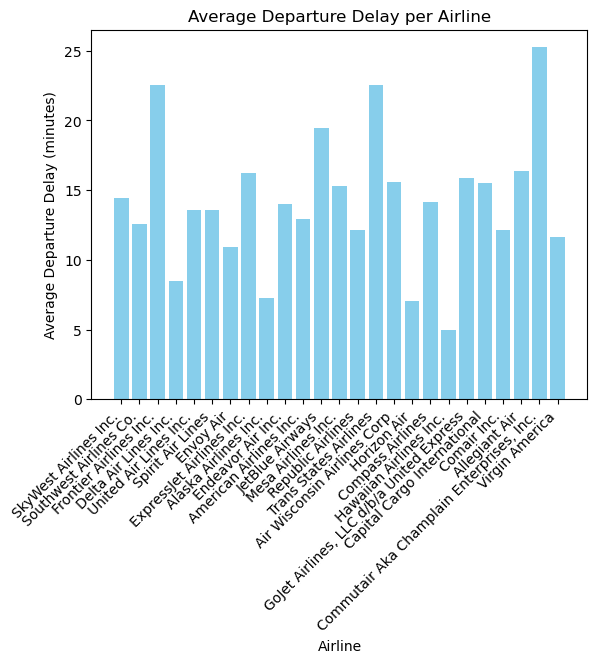

In [94]:
#Now we will plot the data:
plt.bar(average_df['Airline'], average_df['average'], color='skyblue')
plt.title('Average Departure Delay per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [95]:
#DELETE LATER
top_10_origin = origin_groupby.head(10)
top_10_dest = dest_groupby.head(10)

From the above number we can see that the top 10 most popular/ airports with the highest frequency are the same. Now we will plot a graph with this data. This would help us visualize the dat we seen above.

In [96]:
#top_10_origin
top_10_origin

,Origin,origin_count
0,ORD,29077
1,DEN,24850
2,ATL,22571
3,LAX,18467
4,IAH,16218
5,SFO,15805
6,EWR,15092
7,LAS,14459
8,SEA,13180
9,DFW,13035


In [97]:
#top_10_dest
top_10_dest

,Dest,dest_count
0,ORD,29220
1,DEN,25086
2,ATL,22391
3,LAX,18221
4,IAH,16330
5,SFO,15839
6,EWR,15198
7,LAS,14450
8,SEA,13275
9,DFW,13188


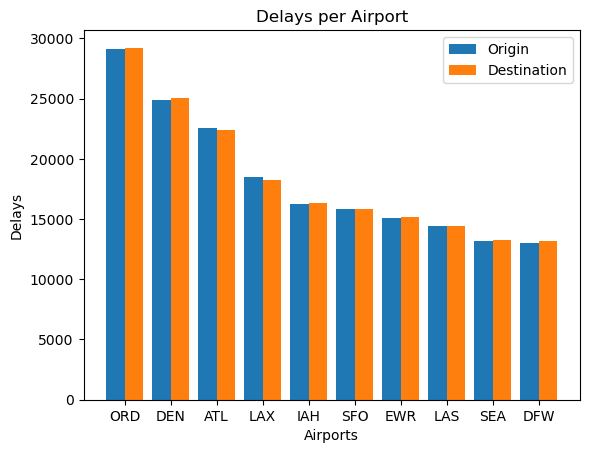

In [98]:
#Now we plot the data from above
joined = top_10_origin.merge(top_10_dest,left_on='Origin',right_on='Dest')
X= joined['Origin']
Y1 = joined['origin_count']
Y2 = joined['dest_count']
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Y1, 0.4, label = 'Origin') 
plt.bar(X_axis + 0.2, Y2, 0.4, label = 'Destination') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Airports") 
plt.ylabel("Delays") 
plt.title("Delays per Airport") 
plt.legend() 
plt.show() 

In [99]:
#Using the top 10 most busiest airports from above I will see the flight delay. To see if there is any relation
top_10_airports = df2[df2['Origin'].isin(['ATL', 'ORD', 'DFW', 'DEN', 'CTL', 'LAX', 'LGA', 'SEA', 'PHX', 'LAS'])]

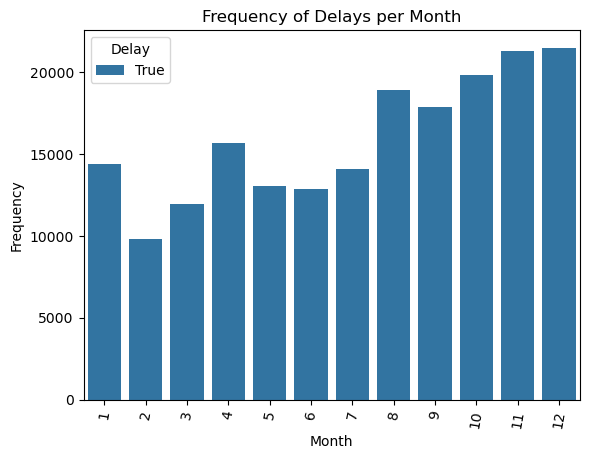

In [100]:
#Time analysis: Depending on the time, how many delays- depending on the month
filtered_df = all_df[all_df['Delay'] == True]
sns.countplot(data=filtered_df, x='Month', hue='Delay')
plt.title('Frequency of Delays per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=80) 
plt.show()

Correlation matrix is : 


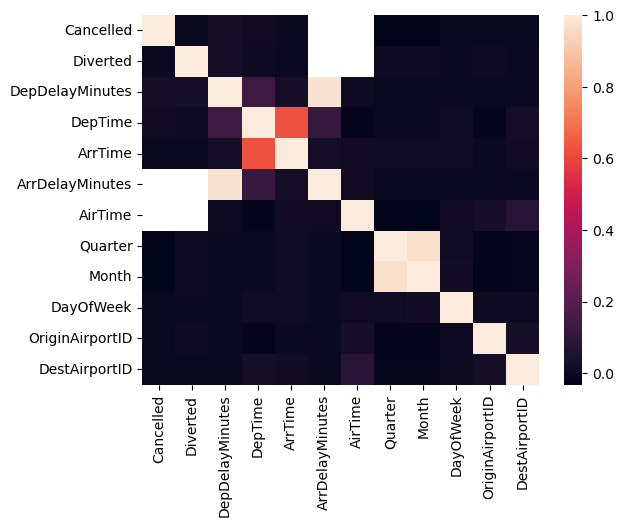

In [101]:
#Correlation analysis of all our colunms
flights_2018_corr = flights_2018[['Cancelled','Diverted','DepDelayMinutes','DepTime','ArrTime','ArrDelayMinutes','AirTime','Quarter','Month','DayOfWeek','OriginAirportID','DestAirportID']]
matrix = flights_2018_corr.corr()
sns.heatmap(matrix)
print("Correlation matrix is : ")
#print(matrix)

From this correlation matrix, we notice that many of the variables we have selected have low correlation with each other, other than the variables that would make sense to be correlated (if a flight is delayed, then its arrival time will be later). This indicates we should look for other data that more directly correlates to the DepDelayMinutes to be able to eventually make predictions based on the data. 

We originally had planned to use weather data as well, but found that the API we were scraping from only had current data. For future parts of the project, we plan to see if there are other resources we can use that have historical weather data and whether that has a greater correlation.

# __DATA DESCRIPTION:__

__Where can your raw source data be found, if applicable? Provide a link to the raw data.__

Flights Delay Prediction: https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv

List of US Airports:https://www.kaggle.com/datasets/aravindram11/list-of-us-airports

NWS Weather Data (Using data scraping and API): https://www.wunderground.com/history/daily/KDEN/date (https://www.wunderground.com/history/daily/KDEN/date)




### __MOTIVATION__
__For what purpose was the dataset created?__
- Flight delays are something most of us who have traveled by air have experienced. Regardless of the reason for delays, they pose a huge inconvenience for travelers. These datasets were created so that relevant analysis can be done on the vast amount of data available on flight travel. This would help generate valuable insight into the cause and effect of flight delays. Gaining insight into this would help airline companies, airports, and passengers. 
- The dataset on the list of US airports with geolocation coordinates was created by Aravind Ram Nathan on Kaggle to make plotting on map analysis easier for researchers. 
- The dataset for the weather that was extracted was for public knowledge. 

__Who funded the creation of the dataset?__
- It is unclear who funded the creation of the Flight Status Prediction Dataset, but the data has been extracted from the Marketing Carrier On-Time Performance (Beginning January 2018) data table of the "On-Time" database from the TranStats data library.


### __COMPOSITION__

__Is the data self contained, or does it link to or otherwise rely on external resources ( Like websites, tweets and other databases)__ <br>

While, the main dataset we will be working with ( Flight status prediction database) which was extracted from Marketing Carrier On-Time Performance (Beginning January 2018) data table of the "On-Time" database from the TranStats data library, contains most of the data we will be using for our analysis. 

As mentioned earlier we did also rely on other external sources for data on US Airports and data on weather in different locations in the US from the Undergraound weather data service, which we made use of web scraping. 
All the data from the 3 sources are easy to understand and usable form for our analysis.

__What are the observations(rows) and attributes (columns)?__
- *Note all these Column names and descriptions are from the kaggle description of the dataset

<br>

__Columns (flight status prediction dataset)__
Year: Year 
Quarter: Quarter (1-4)
Month: Month
DayofMonth: Day of Month
DayOfWeek: Day of Week
FlightDate: Flight Date (yyyymmdd)
Marketing_Airline_Network: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
Operated_or_Branded_Code_Share_Partners: Reporting Carrier Operated or Branded Code Share Partners
DOT_ID_Marketing_Airline: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
IATA_Code_Marketing_Airline: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
Flight_Number_Marketing_Airline: Flight Number
Originally_Scheduled_Code_Share_Airline: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
DOT_ID_Originally_Scheduled_Code_Share_Airline: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
ATA_Code_Originally_Scheduled_Code_Share_Airline: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
Flight_Num_Originally_Scheduled_Code_Share_Airline: Flight Number
Operating_Airline: Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
DOT_ID_Operating_Airline: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
IATA_Code_Operating_Airline: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
Tail_Number: Tail Number
Flight_Number_Operating_Airline: Flight Number
OriginAirportID: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
OriginAirportSeqID: Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.
OriginCityMarketID: Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.
Origin: Origin Airport
OriginCityName: Origin Airport, City Name
OriginState: Origin Airport, State Code
OriginStateFips: Origin Airport, State Fips
OriginStateName: Origin Airport, State Name
OriginWac: Origin Airport, World Area Code
DestAirportID: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
DestAirportSeqID: Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.
DestCityMarketID: Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.
Dest: Destination Airport
DestCityName: Destination Airport, City Name
DestState: Destination Airport, State Code
DestStateFips: Destination Airport, State Fips
DestStateName: Destination Airport, State Name
DestWac: Destination Airport, World Area Code
CRSDepTime: CRS Departure Time (local time: hhmm)
DepTime: Actual Departure Time (local time: hhmm)
DepDelay: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
DepDelayMinutes: Difference in minutes between scheduled and actual departure time. Early departures set to 0.
DepDel15: Departure Delay Indicator, 15 Minutes or More (1=Yes)
DepartureDelayGroups: Departure Delay intervals, every (15 minutes from 180)
DepTimeBlk: CRS Departure Time Block, Hourly Intervals
TaxiOut: Taxi Out Time, in Minutes
WheelsOff: Wheels Off Time (local time: hhmm)
WheelsOn: Wheels On Time (local time: hhmm)
TaxiIn: Taxi In Time, in Minutes
CRSArrTime: CRS Arrival Time (local time: hhmm)
ArrTime: Actual Arrival Time (local time: hhmm)
ArrDelay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
ArrDelayMinutes: Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.
ArrDel15: Arrival Delay Indicator, 15 Minutes or More (1=Yes)
ArrivalDelayGroups: Arrival Delay intervals, every (15-minutes from 180)
ArrTimeBlk: CRS Arrival Time Block, Hourly Intervals
Cancelled: Cancelled Flight Indicator (1=Yes)
CancellationCode: Specifies The Reason For Cancellation
Diverted: Diverted Flight Indicator (1=Yes)
CRSElapsedTime: CRS Elapsed Time of Flight, in Minutes
ActualElapsedTime: Elapsed Time of Flight, in Minutes
AirTime: Flight Time, in Minutes
Flights: Number of Flights
Distance: Distance between airports (miles)
DistanceGroup: Distance Intervals, every 250 Miles, for Flight Segment
CarrierDelay: Carrier Delay, in Minutes
WeatherDelay: Weather Delay, in Minutes
NASDelay: National Air System Delay, in Minutes
SecurityDelay: Security Delay, in Minutes
LateAircraftDelay: Late Aircraft Delay, in Minutes
FirstDepTime: First Gate Departure Time at Origin Airport
TotalAddGTime: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
LongestAddGTime: Longest Time Away from Gate for Gate Return or Cancelled Flight
DivAirportLandings: Number of Diverted Airport Landings
DivReachedDest: Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)
DivActualElapsedTime: Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights.
DivArrDelay: Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights.
DivDistance: Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination.
Div1Airport: Diverted Airport Code1
Div1AirportID: Airport ID of Diverted Airport 1. Airport ID is a Unique Key for an Airport
Div1AirportSeqID: Airport Sequence ID of Diverted Airport 1. Unique Key for Time Specific Information for an Airport
Div1WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code1
Div1TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code1
Div1LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code1
Div1WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code1
Div1TailNum: Aircraft Tail Number for Diverted Airport Code1
Div2Airport: Diverted Airport Code2
Div2AirportID: Airport ID of Diverted Airport 2. Airport ID is a Unique Key for an Airport
Div2AirportSeqID: Airport Sequence ID of Diverted Airport 2. Unique Key for Time Specific Information for an Airport
Div2WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code2
Div2TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code2
Div2LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code2
Div2WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code2
Div2TailNum: Aircraft Tail Number for Diverted Airport Code2
Div3Airport: Diverted Airport Code3
Div3AirportID: Airport ID of Diverted Airport 3. Airport ID is a Unique Key for an Airport
Div3AirportSeqID: Airport Sequence ID of Diverted Airport 3. Unique Key for Time Specific Information for an Airport
Div3WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code3
Div3TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code3
Div3LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code3
Div3WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code3
Div3TailNum: Aircraft Tail Number for Diverted Airport Code3
Div4Airport: Diverted Airport Code4
Div4AirportID: Airport ID of Diverted Airport 4. Airport ID is a Unique Key for an Airport
Div4AirportSeqID: Airport Sequence ID of Diverted Airport 4. Unique Key for Time Specific Information for an Airport
Div4WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code4
Div4TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code4
Div4LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code4
Div4WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code4
Div4TailNum: Aircraft Tail Number for Diverted Airport Code4
Div5Airport: Diverted Airport Code5
Div5AirportID: Airport ID of Diverted Airport 5. Airport ID is a Unique Key for an Airport
Div5AirportSeqID: Airport Sequence ID of Diverted Airport 5. Unique Key for Time Specific Information for an Airport
Div5WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code5
Div5TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code5
Div5LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code5
Div5WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code5
Div5TailNum: Aircraft Tail Number for Diverted Airport Code5
Duplicate: Duplicate flag marked Y if the flight is swapped based on Form-3A data

<br>

__Rows (flight status prediction dataset)__
Each row represents the information that is described in each column for a distinct flight

<br>

__Colunms (List of US airports)__
IATA: 3 letter acronym of the US airport 
AIRPORT: Name of the airport
CITY: Name of the US City the airport is located in 
STATE: Name of the US state the airport is located in
COUNTRY: Country the airport is located in 
LATITUDE: Latitude coordinated of the airport 
LONGITUDE: Longitude coordinated of the airport

<br>

__Rows (List of US airports)__
Each row represents the information that is described in each column for a distinct Airport in the US
Colunms (Weather Data)
Rows (Weather Data)


<br>
__Colunms (List of US airports)__
Date
Temperature
Dew Point
Humidity
Wind
Wind speed
Wind Gust
Pressure
Precipitation
Condition
<br>
__Rows (List of US airports)__
Each row gives the obesrvation of these weather components for a day at a particular time.

### __COLLECTION PROCESS__
__What processes might have influenced what data was observed and recorded and what was not?__
The data that is in this dataset is obtained from the TranStats data library, Public kaggle and National Weather Service. These are all  govermental organizations and public websites, that collect data for public use. In terms of what might have influenced what data was observed and recorded, we can say that this is readily available non personal, not private data that would not breach and acts of privacy. As opposed to any personal data, that contains personal information like phone number, age, name, salary or home address. 
Moreover, some of the airports and airlines operate international flights, this type of data would be ignored or any private jets which go to private airports would be ignored. Even flights that don’t carry passsengers and only carry goods would be ignored for this dataset. 

__Over what timeframe was the data collected?__
The flight delay prediction data was collected for 2018. However for this analysis we only used data from 2018. 
The List of US airports data has no time attribute to it, but was last updated on kaggle 3 years ago from 2023.
Data for weather is only for 2018. 


__What mechanisms or procedures were used to collect the data?__
The flights delay prediction and list of US airports was obtained from online sources which was then collected and uploaded by the creator on kaggle. 
The weather was webscraped frm an online source.

__What preprocessing was done, and how did the data come to be in the form that you are using?__
We only focused on flights for 2018, because that would make our analysis easier, which we named flights_2018. Because these are domestic flights, we dropped the 'country' column. Then, we joined the dataset of airports to flights_2018 using duckdb SQL, while selecting only the columns of these tables that were relevant. Then, while scanning through the arrival minute times, we realized some values were negative, so we converted those to 0. 

We originally had scraped weather data as well, which is included in a separate file, but we are no longer using this. We may scrape weather data from a different API in the future and join it to flights_2018. 

__Has the dataset been used for any tasks already?__
The main dataset is a dataset from Kaggle so people have used it for competitions and exploration. However, we do not have access to their work.

There has also been a lot of analysis done on this topic, but from a different dataset at different times.

__If people are involved, were they aware of the data collection and if so,what purpose did they expect the data to be used for?__
They are aware because they uploaded the data to Kaggle for public use.

# PHASE 4

**Linear Regression** <br>

**Hypothesis 1:** Flights with a larger distance, calculated from the longitudes and latitudes 
of the origins and destinations, are more likely to be delayed than flights with a smaller distance.


We first split the data into train and test set after which we created a linear regression, where the input is the airport distance calculated in the last part of data cleaning. We used that regression and the X and y test sets to make predictions (of the delay time) for the remaining X test values (distances).

In [102]:
train, test = train_test_split(all_df, test_size = 0.20, random_state = 2950)

In [103]:
X_train = train['airport_distance'].values.reshape(-1,1)
y_train = train['DepDelayMinutes']

model = LinearRegression().fit(X_train, y_train)
model.score(X_train,y_train)

X_test = test['airport_distance'].values.reshape(-1, 1)
y_test = test['DepDelayMinutes']

predictions = model.predict(X_test)

We did some additional exploratory analysis to compare the distance to the delay time, and plotted the linear regression line to visualize the general trend. We noticed that although it appeared to have a negative correlation from the data points, the linear regression line was nearly horizontal, because so many data points were concentrated towards lower delay times which skewed the predictions to be within a very small range.

Text(0.5, 1.0, ' linear regression to compare the distance to the delay time ')

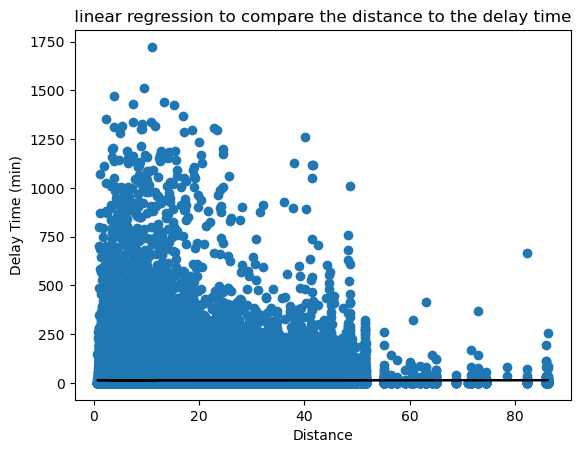

In [104]:
plt.scatter(X_train, y_train)
plt.plot(X_test, predictions,color='k')
plt.xlabel('Distance')
plt.ylabel('Delay Time (min)')
plt.title(" linear regression to compare the distance to the delay time ")

We also plotted the actual and predicted values to see how they compared, and realized that the predicted values were within a range of about 1.5, even though many of the actual values spanned between 0 and 600. It is apparent that our model is not going to be a very accurate predictor.

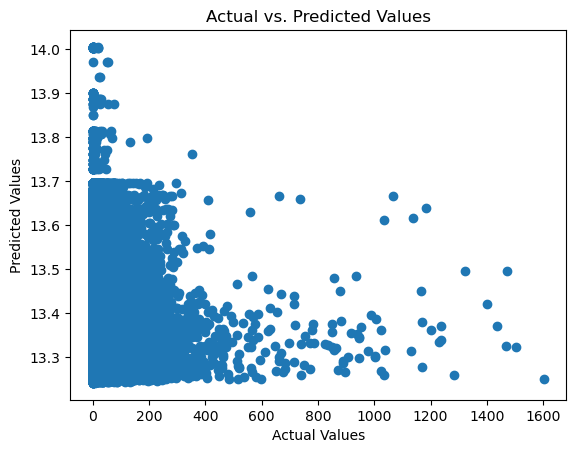

In [105]:
plt.scatter(y_test, predictions)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

We also created a residuals plot, which had very high residuals, so we know that the model is not representative of the data. 

Text(0.5, 1.0, 'Residual Plot')

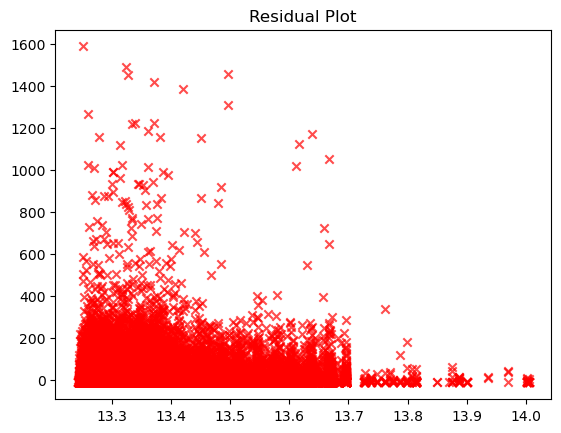

In [106]:
residuals = y_test - predictions
plt.scatter(predictions, residuals, marker='x', color='red', alpha=0.7)
plt.title("Residual Plot")

We can conclude that our hypothesis is incorrect because through our prediction analysis, we did not find any correlation between airport distance and delay time. 

**Logistic Regression** <br>

__Hypothesis 2:__ Flights scheduled during the winter months(December, January, February) are more likely to be delayed compared to flights  scheduled during other months of the year. 

We made use of the delayed flights column and not the cancelled as while doing the logistic regression we realized that all the value for if a flight had been cancled is false. Meaning that when we converted it to a boolen it became zero. This could not work for our logistic regression, as we need both 0 and 1

We have made use of month data from the date as we were not able to get weather data due to the API. That is why we decided to use month data from the date as we think this is the closest we can get to using weather as a factor for our analysis. 

In the cell below we are making use of pd.to_datetime to convert the date values in the FlightsDate column in all_df into the same datatype of datetime64.

In [107]:
all_df["FlightDate"] = pd.to_datetime(all_df["FlightDate"])
print(all_df["FlightDate"].head())

0   2018-03-19
1   2018-03-19
2   2018-03-19
3   2018-03-19
4   2018-03-19
Name: FlightDate, dtype: datetime64[ns]


In [108]:
print(len(all_df))
print(len(pd.DatetimeIndex(all_df['FlightDate']).month))

548760
548760


In the cell below we are making use of pd.DatetimeIndex to extract the month from the flightdate

In [109]:
all_df['flight_month'] = pd.DatetimeIndex(all_df['FlightDate']).month
print(all_df['flight_month'].head())

0    3
1    3
2    3
3    3
4    3
Name: flight_month, dtype: int32


Now we are mapping each of the numerical months. Example where 1 means January. We are mapping the numerical representations of the months to their engligh months. This make the analysis and understanding much easier.

In [110]:
month_mapping = {
    1: 'Jan',2: 'Feb',3: 'March', 
    4: 'April', 5: 'May', 6:'June', 7: 'July', 
    8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

all_df['flight_month'] = all_df['flight_month'].map(month_mapping)

print(all_df['flight_month'].head())

0    March
1    March
2    March
3    March
4    March
Name: flight_month, dtype: object


In [111]:
all_df['delay_bool'] = all_df['Delay'].astype(int)

In the cell above we just convert the values that are a boolen of True or False into 0's and 1's. 

In the cell below we use flight month as an input to our classifier, we need to convert the flight month variable into 12 different dummy variables. For example, one of the new dummy months march, and will equal 1 if that row's month is march, and 0 if that row's month value is not march.
To do this we use pd.get_dummies().

In [112]:
month_dummies = pd.get_dummies(all_df['flight_month'], 
                               dtype=int, drop_first = False) 
print(month_dummies.head())

   April  Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  Sept
0      0    0    0    0    0     0     0      1    0    0    0     0
1      0    0    0    0    0     0     0      1    0    0    0     0
2      0    0    0    0    0     0     0      1    0    0    0     0
3      0    0    0    0    0     0     0      1    0    0    0     0
4      0    0    0    0    0     0     0      1    0    0    0     0


In [113]:
month_with_dummies = pd.concat([all_df, month_dummies ],axis=1)
print(month_with_dummies.head(5))

  FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0 2018-03-19             Horizon Air    SEA  GEG      False     False   
1 2018-03-19        Spirit Air Lines    TPA  CLE      False     False   
2 2018-03-19  Southwest Airlines Co.    MCI  ATL      False     False   
3 2018-03-19         JetBlue Airways    LGB  PDX      False     False   
4 2018-03-19           Allegiant Air    SDF  LAS      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ...  Dec  Feb  Jan  July  \
0         615    610.0              0.0      -5.0  ...    0    0    0     0   
1        1503   1500.0              0.0      -3.0  ...    0    0    0     0   
2        1220   1216.0              0.0      -4.0  ...    0    0    0     0   
3        1057   1053.0              0.0      -4.0  ...    0    0    0     0   
4        2050   2047.0              0.0      -3.0  ...    0    0    0     0   

   June  March  May  Nov  Oct  Sept  
0     0      1    0    0    0     0  
1     0   

Now we will split our dataset into train and test. This will help us while doing our linear regression. 

In [114]:
from sklearn.model_selection import train_test_split
flight_cancelled_train, flight_cancelled_test = train_test_split(month_with_dummies , 
                                             test_size=0.20 , random_state=2950)

Now we want to train a logistic regression model to predict whether a movie is cancelled. We use a logistic regression model that predicts cancelled_bool given the month ( Jan, Feb, March, April, May, June, July, Aug, Sept, Oct, Nov, Dec).
I have defined the Normalizer function from HW4

In [115]:
#code
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))
from sklearn.linear_model import LogisticRegression
input_columns = ['Jan', 'Feb', 'March', 
                 'April', 'May', 'June', 'July', 'Aug','Sept','Oct','Nov','Dec']
X = flight_cancelled_train[input_columns]
y = flight_cancelled_train['delay_bool']
logistic_model = LogisticRegression(random_state=16).fit(Normalizer(X),y)

Now to analyze our model, data and see if our hypothesis is correct we will print the coeff for all the months. We will do this in a table. This make it easier for us to read and understand the values. From the coeff we can figure out which has the highest correlation with the delays.

To do this we first Create lists to store month names and coefficients. Then we Iterate through coefficients and append them to the list. after which we Create a DataFrame with months and coefficients. Below is the printed resulting dataframe. 

In [116]:

coefficients = logistic_model.coef_[0]


months = ['Jan', 'Feb', 'March', 'April', 
          'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
coefficient_values = []


for x in range(len(coefficients)):
    coefficient_values.append(round(logistic_model.coef_[0][x],3))


result_df = pd.DataFrame({
    'Month': months,
    'Coefficient': coefficient_values
})


print(result_df)

    Month  Coefficient
0     Jan       -0.022
1     Feb        0.032
2   March        0.016
3   April       -0.017
4     May        0.041
5    June        0.073
6    July        0.054
7     Aug        0.053
8    Sept       -0.087
9     Oct       -0.065
10    Nov       -0.008
11    Dec       -0.011


From the above table I will interpret the results then link it to my hypothesis. 


1. Our model estimates that, all else equal, if a flight is flying during the month `January`, the odds of the fligh being delayed are decreased, the odds are multiplied by around -0.020 $(e^{-0.020})$
2. Our model estimates that, all else equal, if a flight is flying during the month `Febuary`, the odds of the fligh being delayed are increased, the odds are multiplied by around 0.031 $(e^{0.031})$
3. Our model estimates that, all else equal, if a flight is flying during the month `December`, the odds of the fligh being delayed are increased, the odds are multiplied by around -0.010 $(e^{-0.010})$
4. Our model estimates that, all else equal, if a flight is flying during the month `August`, the odds of the fligh being delayed are increased, the odds are multiplied by around 0.0.051 $(e^{0.0.51})$

**While our initial hypothesis posited that flights scheduled during the winter months would be more prone to delays, the results of our logistic regression model have introduced interesting nuances. Contrary to expectations, certain months outside the winter season (May, Aug and July) exhibit a higher likelihood of delays, challenging our initial assumptions.**

Now we will use the test set to predict our values of y predicted

In [117]:
#Evaluate the test data and predict 
y_pred = logistic_model.predict(Normalizer(flight_cancelled_test[input_columns]))
# Print the first ten values of y_pred
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [118]:
y_true = flight_cancelled_test['delay_bool']
# Print accuracy
print(f"accuracy: {accuracy_score(y_true, y_pred)}")
# Print precision
print(f"precision: {precision_score(y_true, y_pred):.2f}")
# Print recall
print(f"recall: {recall_score(y_true, y_pred):.2f}")
# Print F1
print(f"F1: {f1_score(y_true, y_pred):.2f}")

accuracy: 0.6509494132225381
precision: 0.00
recall: 0.00
F1: 0.00


/Users/tanvikigga/opt/anaconda3/envs/info2950/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Interpreting our results form above from the accuracy, precision, recall score and f1 score**

1. Accuracy: 64.95% of the test data are predicted correctly (i.e. 64.95% of the test data are either true positives, where a true positive is delayed (1) and is predicted to be delayed, or true negatives, where a flight is not delayed (0) and is predicted as not delayed.) From the results above I would say the analysis for 64.95% accuracy is mostly because of a flight that not delayed and is predicted as not delayed due to the high number of 0. 
2. A precision of 0.00 means that the model did not correctly identify any instances of the positive class. This can happen when the model classifies everything as the majority class (e.g., class 0).
3. A recall of 0.00 indicates that the model missed all instances of the positive class.
4. Like precision and recall, an F1 score of 0.00 suggests that the model is not effectively identifying the positive class.



The main issue I have identified for this could be because our model is classifying most instances as the majority class (class 0) and not successfully capturing the positive instances. This could be because our traning dataset is flawed. Most of our data for the flight being delayed is 0. This creates a bias as our model is trained with the majority class zero. This is why we are having issues.

**The main issue is class imbalance, where the majority class (class 0, likely representing non-delayed flights) dominates the training dataset. This imbalance can lead the model to be biased towards predicting the majority class, resulting in high accuracy but poor performance on the positive class (delayed flights).**

# PHASE 5

**Multiple Linear Regression** <br>

__Hypothesis 3:__ Flights scheduled during the extreme weather conditions are more likely to be delayed compared to flights scheduled during normal conditions. 

We will analyize by how much a fight will be delayed in minutes depending on eather data such as (temperature, dew point, humidity, wind, Wind speed, Winds Gust, Pressure, precipitation)

In order to proceed with this analysis and get weather data. From out data analysis above we toook the airports: ORD, DEN, ATL and LAX. From our EDA we can see that these for busiest airports with the most delays in the US. 
Using these four airports we scraped weather data (temperature, dew point, humidity, wind, Wind speed, Winds Gust, Pressure, precipitation and condition). 
Below is an example of the URL that we scarped for Denvers data: 

https://www.wunderground.com/history/daily/KDEN/date (https://www.wunderground.com/history/daily/KDEN/date)

After we scraped the data, we saved this in a file called weather data in our GITHUB. 
We will be using these values for our inputs for the multiple Linear regression. After we make the model for our multiple linear regression. 

We can take a a look at the appendix for the web scraping data.

In [119]:
combined_df.head()

,Date,avg_temp,avg_dew_point,avg_humidity,avg_wind_speed,avg_wind_gust,avg_pressure,avg_precip,dep_delay_minutes
0,2018-01-16,31.564516,23.217742,73.346774,8.193548,0.000000,28.728790,0.000000,NaN
1,2018-01-23,41.196721,28.524590,64.721311,10.639344,3.581967,28.343607,0.000000,NaN
2,2018-02-22,41.732759,33.689655,74.465517,8.905172,0.784483,27.999224,0.000000,NaN
3,2018-02-23,41.164474,33.072368,77.164474,9.105263,2.493421,27.756974,0.000000,NaN
4,2018-02-25,48.948718,35.264957,63.623932,11.581197,9.452991,28.312650,0.009402,NaN


We first split our combined data into train and test datset. 
After that we have the weather variables that we want to use for our multiple regression as inpur_vars. After which by using the train data we build our model and ourput the coeefs for the respective model.

In [120]:
combined_train, combined_test = train_test_split(combined_df, test_size=0.1, random_state=2950)

In [171]:
input_vars = ["avg_temp", "avg_dew_point", "avg_humidity","avg_wind_speed","avg_wind_gust","avg_pressure","avg_precip"]

X = combined_train[input_vars]
y = combined_train['dep_delay_minutes']

model=LinearRegression().fit(X,y)

for var_name, var_coef in zip(input_vars, model.coef_):
    print(f"{var_name}: {round(var_coef,2)}")

print(f"intercept: {round(model.intercept_,2)}")

ValueError: Input y contains NaN.

Interpretation:
1. avg_temp: 0.04: A one-unit increase in average temperature is associated with a 0.04 unit increase in the delay of flights. This suggests a positive relationship between temperature and flight delay, meaning higher temperatures are associated with longer delays.

2. avg_dew_point: 0.03: A one-unit increase in average dew point is associated with a 0.03 unit increase in the delay of flights. This implies that higher dew points, and by extension, higher humidity, are associated with longer delays.

3. avg_humidity: 0.67: A one-unit increase in average humidity is associated with a 0.67 unit increase in the delay of flights. This indicates a positive relationship, suggesting that higher humidity levels are associated with longer delays.

4. avg_wind_speed: -0.66: A one-unit increase in average wind speed is associated with a -0.66 unit decrease in the delay of flights. The negative sign suggests an inverse relationship, meaning higher wind speeds are associated with shorter delays.

5. avg_wind_gust: 1.62: A one-unit increase in average wind gust is associated with a 1.62 unit increase in the delay of flights. This indicates a positive relationship, suggesting that higher wind gusts are associated with longer delays.

6. avg_pressure: 8.47: A one-unit increase in average atmospheric pressure is associated with an 8.47 unit increase in the delay of flights. This suggests a positive relationship between atmospheric pressure and flight delay.

7. avg_precip: 98.75: A one-unit increase in average precipitation is associated with a 98.75 unit increase in the delay of flights. This indicates a strong positive relationship, suggesting that precipitation has a significant impact on increasing flight delays.


From this we can say that Average precipitation, rain has a significant effect on the fact that a flight might get delayed. After wich it is the average humidity and wind gust and pressure. 
The one thing that did shock us is the fact that wind speed had a negetive relationship, which our group did not this. 

**The results from our multiple regression suggests that it does agree with our hypothesis, as weather does play a role in the fact that flights might get delayed. 

In [ ]:
train_predictions = model.predict(combined_train[input_vars])
test_predictions = model.predict(combined_test[input_vars])

Now we use the predict function to predict the values of delay in minutes.

In [ ]:
train_rmse = np.sqrt(np.mean((train_predictions - combined_train["dep_delay_minutes"])**2))
test_rmse = np.sqrt(np.mean((test_predictions - combined_test["dep_delay_minutes"])**2))

# Print train RMSE
print(f"Train RMSE: {round(train_rmse, 2)}")
# Print test RMSE
print(f"Test RMSE: {round(test_rmse, 2)}")

The test RMSE is a measure of how well your model generalizes to new, unseen data (the test set).
In this case, a lower RMSE (122.0) is preferable as it indicates that, on average, our multiple regression model's predictions are approximately 122.0 units away from the actual values in the test set.
A test RMSE close to the training RMSE suggests that your model is not overfitting the training data and is performing reasonably well on new data.

In [ ]:
train_mae = np.mean(np.abs(train_predictions - combined_train["dep_delay_minutes"]))
test_mae = np.mean(np.abs(test_predictions - combined_test["dep_delay_minutes"]))

# Print train MAE
print(f"Train MAE: {round(train_mae, 2)}")
# Print test MAE
print(f"Test MAE: {round(test_mae, 2)}")

A lower MAE indicates better model performance. In this context, a Test MAE of 70.68 suggests that, on average, your model's predictions are about 70.68 units off from the true values in the test dataset.


**Random Forest Regression** <br>

Now that we have analyzed hypothesis 3 using multiple linear regression, one thing that we assumed was that there was a linear relationship between our input variable (weather data) and our output variable. Now we will be using XG Boost to predict the how much a fight will be delayed in minutes depending on data such as (temperature, dew point, humidity, wind, Wind speed, Winds Gust, Pressure, precipitation). 

__Why did we decide to use Random Forest Model?__: 
1. Random Forests can model complex, non-linear relationships between input features and the target variable. In contrast, Multiple Linear Regression assumes a linear relationship 
2. Random Forests are generally robust to outliers in the data.
3. Random Forests can effectively handle high-dimensional data with many features without the risk of overfitting.

Resources used for these: <br>
1.https://www.turing.com/kb/scikit-learn-cheatsheet-methods-for-classification-and-regression <br>
2.https://www.datacamp.com/tutorial/random-forests-classifier-python <br>
3.https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/




We first imported the package RandomForestRegressor from sklearn, this wopuld help us make the random forest model. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Similar to linear regression and logistic regression we firt the model over a random forest regressor. Using 100 estimatots. We used 100 as from the websites we used, that was the standard value used.

In [ ]:
X = combined_train[input_vars]
y = combined_train['dep_delay_minutes']
clf = RandomForestRegressor(n_estimators=100, random_state=2950)   
clf.fit(X, y) 


We then fit the model on a random forest. And used the predictions to predict the value. 

In [ ]:
predictions = clf.predict(combined_test[input_vars])
print(predictions)

In [ ]:
random_test_rmse = np.sqrt(np.mean((predictions - combined_test["dep_delay_minutes"])**2))
random_test_mae = np.mean(np.abs(predictions - combined_test["dep_delay_minutes"]))
print(f"RMSE {random_test_rmse}")
print(f"mae {random_test_mae}")

1. The Random Forest model has a slightly lower RMSE compared to the Multiple Linear Regression model. This suggests that, on average, the predictions made by the Random Forest model are closer to the actual values than those made by the Multiple Linear Regression model.
2. The Random Forest model has a significantly lower MAE compared to the Multiple Linear Regression model. This indicates that, on average, the absolute errors between the predicted and actual values are smaller for the Random Forest model.

Therefore we can interpret that: <br>
**The Random Forest model is performing better than the Multiple Linear Regression model based on both RMSE and MAE.
The Random Forest model seems to provide more accurate predictions, as indicated by the lower values of both RMSE and MAE.**

# CONCLUSION AND INTERPRETATIONS

Our project explored what factors best predict flight delays and cancellations in the United States. We used flight data from 2018 because it was a complete dataset from a year that did not overlap with COVID which would produce different trends in delays and cancellations. Our dataset included nearly 5 million flights which was too large to work with, so we took a 10% random sample of the data. Each row represented a flight, and included columns that defined the origin and destination airports and their locations, the length of the delay of the flight, whether the flight was cancelled or not cancelled, and other variables which could be used as predictors. 

Our first hypothesis was that flights with a larger distance, calculated from the longitudes and latitudes of the origins and destinations, are more likely to be delayed than flights with a smaller distance. We conclude that flights with a larger distance are not more likely to be delayed than flights with a smaller distance. There is no direct correlation between flight distance and delay time of flights. Our data showed that flight delay times are very concentrated around very slight delays, so it is difficult to make predictions about flight delay time from just the distance between airports because predicted values were concentrated around the same delay times. 

Our second hypothesis was that flights scheduled during the winter months(December, January, February) are more likely to be delayed compared to flights scheduled during other months of the year. While our initial hypothesis posited that flights scheduled during the winter months would be more prone to delays, the results of our logistic regression model have introduced interesting nuances. Contrary to expectations, certain months outside the winter season (May, Aug and July) exhibit a higher likelihood of delays, challenging our initial assumptions.

# __DATA LIMITATIONS__:

__The main limitations of our data set that have been noticed are:__
1) The dataset also does not have many descriptive variables that affect the delays or cancellations. This means that we are not able to find high correlation values and therefore will struggle to create a predictive model or generate any meaningful insights. 
2) Because of US weather api issues we were not able to get any data on US weather. This created issues as we were not able to improve our analysis and add more depth to our analysis on weather data. This affected our analysis as we were not able to make a more comprehensive analysis and predict to see if flight delays and cancellation is affe cted by weather. 
3) Another issue we faced was that our flight cancellation and delay column most of the entries are false. When we convert it to a binary, most of the values will be zero. This creates an issue when we trained our logistic regression. Creating class imbalance, where the majority class (class 0, likely representing non-delayed flights) dominates the training dataset. This imbalance can lead the model to be biased towards predicting the majority class, resulting in high accuracy but poor performance on the positive class (delayed flights). 

# FUTURE RESEARCH

Future research could include using a multiple regression with more variables in addition to distance to see if we can get a more accurate prediction of the delay times. Additionally, this could include weather data if a future research study had funding to purchase data from the weather API. We could also use international data rather than just data of flights in the US. 

# __Refrences:__

1. https://medium.com/analytics-vidhya/modeling-flight-delays-through-u-s-flight-data-2f0b3d7e2c89
2. https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv 
3. https://www.kaggle.com/datasets/aravindram11/list-of-us-airports 


# __Appendix:__


Below is the code used to sample 10% of our large datset to get data for flights in 2018. 

In [ ]:
#df1 = pd.read_csv('Combined_Flights_2018.csv')
#df2 = pd.read_csv('Combined_Flights_2019.csv')
#df1.head()

In [ ]:
#print(len(df1.index))

In [ ]:
#smaller_df = pd.DataFrame()

#for month in range(1,13):
    #sample = df1[df1['Month'] == month].sample(frac=.1)
    #smaller_df = pd.concat([smaller_df, sample])

#smaller_df.head()
#print(len(smaller_df.index))

In [ ]:
#smaller_df = smaller_df.sort_values('FlightDate')

In [ ]:
#smaller_df.to_csv(r'/Users/joshuapark/Downloads/test-2950/Flights_2018_Modified.csv')

Below is the code used to scrape weather data from Weather Underground

In [ ]:
# import csv
# import time
# import datetime
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# import pandas as pd


# date = datetime.datetime(2018,12,3)

# endDate = datetime.datetime(2018,12,3)

# prefixURL = 'https://www.wunderground.com/history/daily/KLAX/date/'
# # prefixURL = 'https://www.wunderground.com/history/daily/KATL/date/'
# # prefixURL = 'https://www.wunderground.com/history/daily/KDEN/date/'
# # prefixURL = 'https://www.wunderground.com/history/daily/KORD/date/'


# def scrape_page(date, prefixURL, sleepTime, errorOccurs):
#         print("")
#         print("Function started:", time.strftime("%H:%M:%S", time.localtime()))     
#         url = ''.join([prefixURL+str(date.date())])
#         print("scraping:", url)

#         driver = webdriver.Chrome()
#         driver.get(url)
#         tables = WebDriverWait(driver,2).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "table")))

#         time.sleep(sleepTime) #obey robots.txt, adds time to reduce errors

#         a = pd.read_html(tables[1].get_attribute('outerHTML'))
#         df=a[0]
#         df = df[df['Time'].notna()] #drops rows
#         df.insert(0, 'Date', date, allow_duplicates=True)
#         print(df)
#         df.to_csv(r'temps.csv', index = False, columns=['Date','Time','Temperature','Dew Point','Humidity','Wind','Wind Speed','Wind Gust','Pressure','Precip.','Condition'], mode='a', header=None)
#         print("There are", len(df), "rows for", str(date.date()))
#         with open('NumEntries.csv', 'a', newline='') as file:
#             writer = csv.writer(file)
#             writer.writerow([str(date.date()),len(df)])


# errorTracker= 0
# MAXERROR = 1

# while date <= endDate:
#     if errorTracker >=MAXERROR:
#         print("There were ", errorTracker, " errors in a row, so the program stopped. Check the NumEntriesFile")
#         # break
#         date += datetime.timedelta(days=1)

#     try:
#         scrape_page(date,prefixURL,sleepTime=3, errorOccurs=False)
#         date += datetime.timedelta(days=1)   #increments date by one
#         errorTracker=0 # returns errorTracker to 0

#     #### If the scrape_page() function runs and fails then the date is not incremented

#     except IndexError as e:
#         print("AN ERROR OCCURRED", str(e)) 
#         time.sleep(5)  #wait 
#         with open('NumEntries.csv', 'a', newline='') as file:
#             writer = csv.writer(file)
#             writer.writerow(["NEW ERROR, did not get df",str(e),str(date.date())])
#         errorTracker += 1

#     except:   # spotty wifi
#         print("AN ERROR OCCURRED") 
#         time.sleep(5)  #wait if timoutexception raised and try again, spotty wifi
#         with open('NumEntries.csv', 'a', newline='') as file:
#             writer = csv.writer(file)
#             writer.writerow(["NEW ERROR, did not get df",str(date.date())])
#         errorTracker += 1

